# Supervised Learning: Regression Modeling

In this week's workshop, we will learn about `supervised machine learning` wherein an annotated data having input-output pair is given to us to train machine learning model. The trained model then can be used to make predictions on `unsee` data (or test set). We aim to work on the following tasks:
- Ordinary linear regression model on one-dimensional feature/variable
- Ordinary linear regression model on multi-dimensional features/variables
- Ridge regression and hyper-parameter tuning

### Dataset Description

In the `data` directory, we are given `houses_portland.csv` file which contains columns for `area of a house`, `number of bedrooms in a house`, and `price`. The goal is to build model which can predict `price of a house` given `number of bedrooms` and `area`. First we will load dataset and find relationship between variables.

In [1]:
#import commonly-used modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the dataset

data = pd.read_csv("houses_portland.csv")

print("data size: " + str(data.shape))
data.head() #print first 5 rows

data size: (47, 3)


,area,bedroom,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Task 1: Ordinary linear regression model on one-dimensional feature/variable

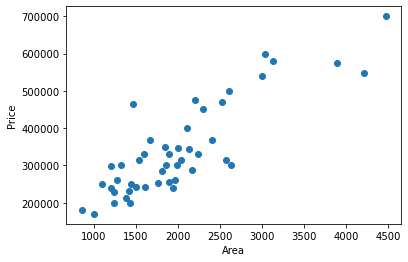

In [3]:
#visually explore the relationship between "area" and "price"

X = data['area'].values
y = data['price'].values

plt.scatter(X, y)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

### Split data into `train` and `test` using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) method from sklearn library.

In [4]:
#split data

from sklearn import model_selection as ms

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2) #20% test data 80% train data

X_train = np.reshape(X_train, (-1, 1)) #change from 1D array to 2D array, why use 2D?
X_test = np.reshape(X_test, (-1, 1))

print("Training data feature shape:", X_train.shape)
print("Training data label shape:", y_train.shape)
print("Test data feature space shape:", X_test.shape)
print("Test data label shape:", y_test.shape)

Training data feature shape: (37, 1)
Training data label shape: (37,)
Test data feature space shape: (10, 1)
Test data label shape: (10,)


Looking at the shape of train and test sets, we can say that out of total 47 samples, 37 samples are in training and the remaining 10 samples are in test. Look at the documentation of `train_test_split` function to find out whether data is shuffled or not during the split operation.

### Model Development (or model training)

In [5]:
#build linear regression model

from sklearn import linear_model as lm

ordinaryLRmodel = lm.LinearRegression()
ordinaryLRmodel.fit(X_train, y_train) #to train model

LinearRegression()

In [6]:
#print coefficient and intercept

print("Coefficient:", ordinaryLRmodel.coef_)
print("Intercept:", ordinaryLRmodel.intercept_)

Coefficient: [136.78498746]
Intercept: 59307.82910765242


What is an Intercept? How you define coefficient? Can you comment on the importance of coefficient and intercept? What does these numbers signify in terms of price of a house?

### Plotting regression line

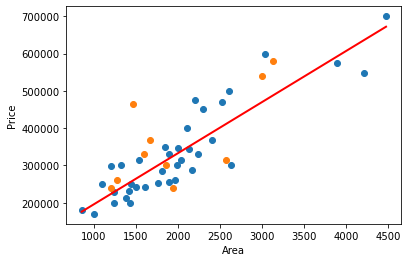

In [7]:
#plot the model

x_line=[X.min(), X.max()]
y_line=[ordinaryLRmodel.intercept_ + ordinaryLRmodel.coef_ * X.min(), ordinaryLRmodel.intercept_ + ordinaryLRmodel.coef_ * X.max()]

plt.plot(x_line, y_line, 'r', lw = 2)
plt.scatter(X_train, y_train)
plt.scatter(X_test, y_test)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

#37 = blue = train data
#10 = orange = test data

### Model Evaluation (on test set)

In [8]:
#prediction/testing

y_pred = ordinaryLRmodel.predict(X_test)
y_pred

array([286918.04824732, 469662.79149887, 223860.16902653, 232751.19321168,
       278163.80904964, 324670.70478731, 410434.89192707, 258740.34082979,
       312633.6258905 , 488402.33478141])

In [9]:
#performance metrics
from sklearn.metrics import mean_squared_error, r2_score

#the mean squared error
print('Mean squared error: %.2f' %mean_squared_error(y_test, y_pred))

#the coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' %r2_score(y_test, y_pred))

Mean squared error: 8258716707.00
Coefficient of determination: 0.40


## Task 2: Ordinary linear regression model on multi-dimensional features/variables

In [10]:
#data preparation

X = data[['area', 'bedroom']].values
y = data['price'].values

print(X.shape) #(47,2)
print(y.shape) #(47,1)

(47, 2)
(47,)


### Split data into training and testing sets

In [11]:
#split data

from sklearn import model_selection as ms

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2, random_state = 142) #set random_state to get same output
print("Training data feature shape:", X_train.shape)
print("Training data label shape:", y_train.shape)
print("Test data feature space shape:", X_test.shape)
print("Test data label shape:", y_test.shape)

Training data feature shape: (37, 2)
Training data label shape: (37,)
Test data feature space shape: (10, 2)
Test data label shape: (10,)


### Build linear regression model

In [18]:
#build linear regression model

from sklearn import linear_model as lm

model2 = lm.LinearRegression()
model2.fit(X_train, y_train) #to train model

LinearRegression()

### Check model coefficients and comment

In [19]:
#print the coefficients

print("Coefficient:", model2.coef_)
print("Intercept:", model2.intercept_) 

Coefficient: [141.80327823 123.16809456]
Intercept: 63175.63367314078


### Do model predictions on test set

In [20]:
#prediction/testing

y_pred = model2.predict(X_test)
y_pred

array([265898.41598452, 338766.66580873, 243351.69474667, 370246.99357478,
       264215.41182948, 239239.39967814, 238813.98984346, 661369.12377161,
       281071.36675464, 299382.62482939])

### Get model scores in terms of MSE and r^2 scores

In [16]:
#performance metrics
from sklearn.metrics import mean_squared_error, r2_score

#the mean squared error
print('Mean squared error (MSE): %.2f' %mean_squared_error(y_test, y_pred))

#the coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2 score): %.2f' %r2_score(y_test, y_pred))

Mean squared error (MSE): 4262225572.05
Coefficient of determination (R2 score): 0.58


## Task 3: Ridge regression and hyperparameter tuning

In [21]:
# Data preparation
X = data[['area', 'bedroom']].values
y = data['price'].values

#data standardization
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
ss.fit(X.astype(np.float))
X = ss.transform(X.astype(np.float))

y = np.reshape(y, (-1, 1))  
ss.fit(y.astype(np.float))
y = ss.transform(y.astype(np.float))

### Split data into training and test sets

In [22]:
#split data

from sklearn import model_selection as ms

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.2)
print("Training data feature shape:", X_train.shape)
print("Training data label shape:", y_train.shape)
print("Test data feature space shape:", X_test.shape)
print("Test data label shape:", y_test.shape)

Training data feature shape: (37, 2)
Training data label shape: (37, 1)
Test data feature space shape: (10, 2)
Test data label shape: (10, 1)


### Build linear regression model

In [23]:
#build linear regression model

from sklearn import linear_model as lm

model3 = lm.LinearRegression()
model3.fit(X_train, y_train) #to train model

LinearRegression()

### Check model coefficients

In [24]:
#print the coefficients

print("Coefficient:", model3.coef_)
print("Intercept:", model3.intercept_) 

Coefficient: [[ 0.91153468 -0.10922288]]
Intercept: [0.0075175]


### Do model predictions on test set

In [25]:
#prediction/testing

y_pred = model2.predict(X_test)
y_pred

array([63015.63634857, 63105.63838386, 63190.59020474, 63284.57339137,
       63009.86467497, 62985.33506214, 63003.91263656, 63075.51746223,
       62963.85852518, 63421.1095451 ])

### Get model scores in terms of MSE and r^2 scores

In [26]:
#performance metrics
from sklearn.metrics import mean_squared_error, r2_score

#the mean squared error
print('Mean squared error (MSE): %.2f' %mean_squared_error(y_test, y_pred))

#the coefficient of determination: 1 is perfect prediction
print('Coefficient of determination (R2 score): %.2f' %r2_score(y_test, y_pred))

Mean squared error (MSE): 3982386960.37
Coefficient of determination (R2 score): -9652038403.56


### Model hyper-parameter tuning

When you check the documentation of `ridge regression` on sklearn API [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html), you will find `alpha` as one of the parameter that is a `regularisation` term. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization.

Your task is to change `alpha` value and see its impact on model performance. Do you see any noticeable change in model performance with changing `alpha` value. Write your analysis in the cell provided. 

In [ ]:
#tune the model hyperparameter alpha (See lecture notes)

from sklearn.linear_model import Ridge

ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

### Write your summary below

In [ ]:
T = [[-1, 1], [6, 2], [3, 3],[3, 4], [1, 3], [9, '?']]
T

In [ ]:
len(T)

In [ ]:
T = [[-1, 6, 3, 3, 1, 9],[1, 2, 3, 4, 4, '?']]

In [ ]:
T

In [ ]:
T[0]

In [ ]:
T[1]

In [ ]:
def averageOfList(num):
    sumOfNumbers = 0
    for t in num:
        sumOfNumbers = sumOfNumbers + t

    avg = sumOfNumbers / len(num)
    return avg


print("The average of List is", averageOfList(T[1]))

In [ ]:
T[1]

In [ ]:
print("The average of List is", averageOfList(T[1][:-1]))

In [ ]:
import statistics as st

In [ ]:
st.median(T[0])

In [ ]:
st.mode(T[0])

In [ ]:
st.mean(T[0])

In [ ]:
st.mean(T[1][:-1])

In [ ]:
from sklearn.preprocessing import normalize

X = [[1, -1, 2], [2, 0, 0], [0, 1, -1]]

In [ ]:
l2_norm = normalize(X, norm='l2')
l2_norm

In [ ]:
l1_norm = normalize(X, norm='l1')
l1_norm

In [ ]:
l2_norm[0]

In [ ]:
l2_norm[0][0]

In [ ]:
l2_norm[0][1]

In [ ]:
l2_norm[0][2]

In [ ]:
import math

math.sqrt(l2_norm[0][0]*l2_norm[0][0] + l2_norm[0][1] * l2_norm[0][1] + l2_norm[0][2] * l2_norm[0][2])